In [787]:
# Business Challenge: Cohort Analysis for Ironhack Payments (Project 1)

In [788]:
# Importing the Seaborn library for advanced data visualization (as sns)
import seaborn as sns

# Importing the Matplotlib library for basic plotting functionalities (as plt)
import matplotlib.pyplot as plt

# Importing the Pandas library for data manipulation and analysis (as pd)
import pandas as pd

cash_request = pd.read_csv('extract - cash request - data analyst.csv')
fees = pd.read_csv('extract - fees - data analyst - .csv')

In [789]:
## Importing and reading csv datasets. Add them to variables cash_request and fees
cash_request = pd.read_csv('extract - cash request - data analyst.csv')
fees = pd.read_csv('extract - fees - data analyst - .csv')

In [790]:
# Convert datasets to pandas DataFrames 
cash_request = pd.DataFrame(cash_request)
fees = pd.DataFrame(fees)

In [791]:
## Overview of the DataFrame cash_request
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [792]:
# Overview of the DataFrame fees
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [793]:
# 1. Calculate Frequency of service Usage

In [794]:
## Transform column with dates to format yyyy-mm
cash_request['created_at'] = cash_request['created_at'].str[0:7]
fees['created_at'] = fees['created_at'].str[0:7]

In [795]:
## Create a series count_dates that groups the cash_request DataFrame by the created_at column and then counts the number of occurrences of each unique date in the created_at column 
count_dates = cash_request.groupby('created_at')['created_at'].count()
count_dates

created_at
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Name: created_at, dtype: int64

In [796]:
## Sort count_dates by date
count_dates = count_dates.sort_index()
count_dates

created_at
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Name: created_at, dtype: int64

In [797]:
## Convert count_dates series into DataFrame
count_dates = pd.DataFrame(count_dates)
count_dates



,created_at
created_at,
2019-11,1
2019-12,289
2020-01,223
2020-02,184
2020-03,244
2020-04,473
2020-05,837
2020-06,2615
2020-07,3601


In [798]:
## Rename columns name
count_dates = count_dates.rename(columns={'created_at' : 'Count'})



In [799]:
## Remove 'created_at' from index column
count_dates  = count_dates.reset_index()

In [800]:
## Rename created_at to Cohort
count_dates = count_dates.rename(columns={'created_at' : 'cohort'})
count_dates

,cohort,Count
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473
6,2020-05,837
7,2020-06,2615
8,2020-07,3601
9,2020-08,3417


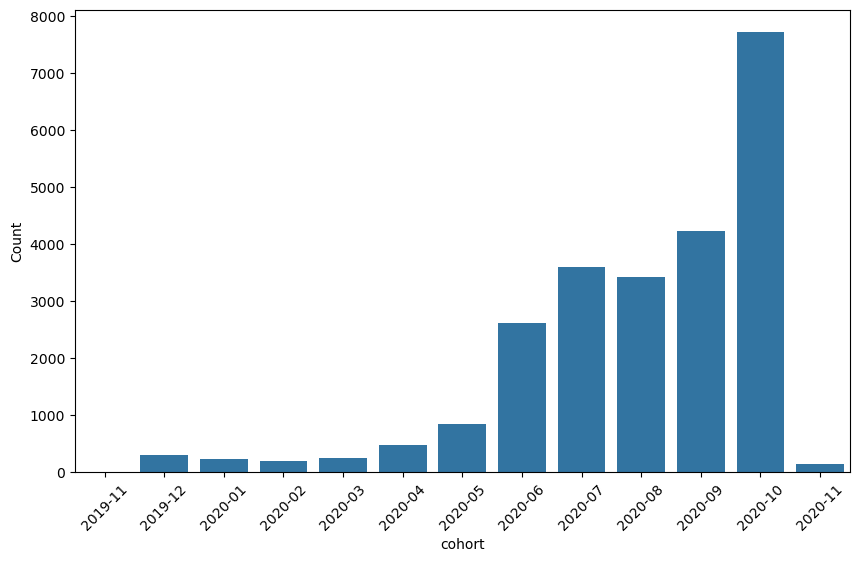

In [801]:
## Plot the frquency usage

### Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data = count_dates, x= 'cohort', y= 'Count')

### Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

### Show the plot
plt.show()

In [802]:
# 2. Incident Rate
## datapoints that have empty cells in 'recovery_status' column have no incidents
## add a column no_incident to cash_request with boolean(true/false)
cash_request['no_incidents'] = cash_request['recovery_status'].isna()

## Create a series no_incidents that groups the cash_request DataFrame by the created_at column and then counts the number of occurrences True in column no_incidents
no_incidents = cash_request.groupby('created_at')['no_incidents'].sum()

## Convert to Dataframe and sort by date
no_incidents =pd.DataFrame(no_incidents)
no_incidents = no_incidents.sort_values(by='created_at')

## Reset index and rename created_at to Cohort to have same format as count_dates
no_incidents = no_incidents.reset_index()
no_incidents = no_incidents.rename(columns={'created_at': 'cohort'})
no_incidents



,cohort,no_incidents
0,2019-11,1
1,2019-12,250
2,2020-01,190
3,2020-02,168
4,2020-03,226
5,2020-04,414
6,2020-05,708
7,2020-06,2286
8,2020-07,3199
9,2020-08,2979


In [803]:
## Merge no_incidents with count_dates on key='cohort' to have all info of cohort

info = pd.merge(count_dates,no_incidents,on='cohort',how='outer')


## Add a column incidents = Count - no_incidents
info['incidents'] = info['Count']-info['no_incidents']
info

## Calculate incident rate = incident/ count * 100
info['incident_rate'] = (info['incidents']/info['Count'])*100
info['incident_rate'] = info['incident_rate'].round(1)
info


,cohort,Count,no_incidents,incidents,incident_rate
0,2019-11,1,1,0,0.0
1,2019-12,289,250,39,13.5
2,2020-01,223,190,33,14.8
3,2020-02,184,168,16,8.7
4,2020-03,244,226,18,7.4
5,2020-04,473,414,59,12.5
6,2020-05,837,708,129,15.4
7,2020-06,2615,2286,329,12.6
8,2020-07,3601,3199,402,11.2
9,2020-08,3417,2979,438,12.8


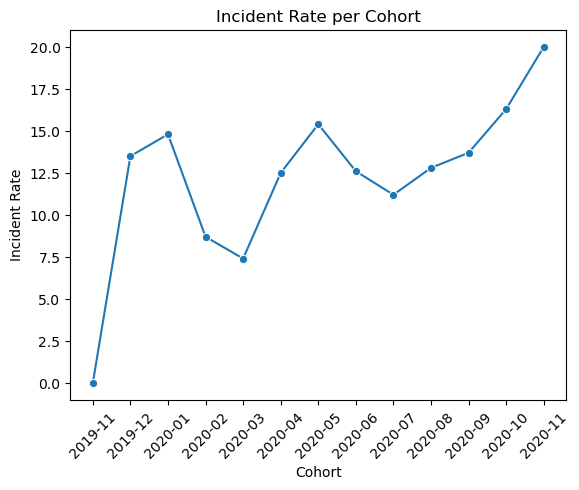

In [804]:
## Plot the results 
sns.lineplot(data=info, x='cohort', y='incident_rate', marker="o")

# Adding labels and title
plt.xlabel("Cohort")
plt.ylabel("Incident Rate")
plt.title("Incident Rate per Cohort")

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display plot
plt.show()

In [805]:
# 3. Calculate the total revenue generated by each cohort
# total revenue = revenue generated by cash requests + revenue generated by fees


In [806]:
## 3.1. Calculate revenue generated by cash requests cr_rev, per cohort
### filter cash requests by column values where status = approved, money_sent, direct_debit_sent. waiting_reimbursement,active, money_back
cash_request['status'].unique()
cash_request = cash_request[cash_request['status'].isin(["approved", "money_sent", "direct_debit_sent", "waiting_reimbursement","active", "money_back"])]


### Create a Dataframe cr_revenue that groups filtered cash request DataFrame by cohort ('created_at') column and then sums the values in column amount
cr_revenue = cash_request.groupby('created_at')['amount'].sum()

cr_revenue

created_at
2019-12     14590.0
2020-01      9729.0
2020-02      9725.0
2020-03     15950.0
2020-04     29933.0
2020-05     55903.0
2020-06    149133.0
2020-07    176161.0
2020-08    172131.0
2020-09    222473.0
2020-10    498734.0
2020-11      9760.0
Name: amount, dtype: float64

In [807]:

### Convert cr_revenue series into DataFrame
cr_revenue = pd.DataFrame(cr_revenue)

### Add index column to cr_revenue
cr_revenue = cr_revenue.reset_index()

### Rename column 'created_at' as Cohort and 'amount' as 'cr_rev´
cr_revenue = cr_revenue.rename(columns={'created_at' : 'cohort', 'amount' : 'cr_rev'})
cr_revenue

,cohort,cr_rev
0,2019-12,14590.0
1,2020-01,9729.0
2,2020-02,9725.0
3,2020-03,15950.0
4,2020-04,29933.0
5,2020-05,55903.0
6,2020-06,149133.0
7,2020-07,176161.0
8,2020-08,172131.0
9,2020-09,222473.0


In [808]:
## 3.2. Calculate revenue generated by fees fees_rev, per cohort
## Create a DataFrame that connects Cash request ID with cohort
cohort_to_id = cash_request[['created_at','id']]


cohort_to_id


,created_at,id
5,2020-05,2145
11,2020-05,1794
13,2020-05,2122
43,2020-05,1629
48,2020-10,23534
...,...,...
23965,2020-10,20616
23966,2020-10,25243
23967,2020-10,22357
23968,2020-10,20256


In [809]:

cohort_to_id = cohort_to_id.rename(columns = {'created_at' : 'cohort', 'id': 'cr_id'})


## Filter fees to obtain only datapoints where status = confirmed or =accepted
fees_ok = fees[fees['status'].isin(['confirmed', 'accepted'])]

In [835]:
## Create a DataFrame of all fees of all cash_request_ids (each cr_id can have multiple fees)
## It is important to note that the 'created_at' date from fees may not bee the same of cohort
fees_revenue = fees_ok[['cash_request_id','total_amount']]
fees_revenue



,cash_request_id,total_amount
1,11714.0,5.0
2,23371.0,5.0
3,26772.0,5.0
4,19350.0,5.0
5,24052.0,5.0
...,...,...
20997,20616.0,5.0
21002,17921.0,5.0
21009,15088.0,5.0
21039,12520.0,5.0


In [ ]:

## Rename 'cash_request_id' to have the same nomenclature as cohort_to_id
## Rename total_amount as fees_rev
fees_revenue = fees_revenue.rename(columns={'cash_request_id' : 'cr_id', 'total_amount' : 'fees_rev'})

## Convert cr_id in both dataframes to integer to be compatible
fees_revenue['cr_id'] = fees_revenue['cr_id'].astype(int)
cohort_to_id['cr_id'] = cohort_to_id['cr_id'].astype(int)

## Merge cohort_to_id with fees_revenue so that we can associate a fee with cohort
fees_revenue = pd.merge(fees_revenue, cohort_to_id, on='cr_id',how='left')
fees_revenue['fees_rev'].sum()

## Now we can drop cr_id from fees_revenue Dataframe
fees_revenue = fees_revenue[['cohort','fees_rev']]
fees_revenue['cohort'].unique()

In [682]:
## Now we group the sum of fee_rev per cohort
fees_revenue = fees_revenue.groupby('cohort')['fees_rev'].sum()
fees_revenue

cohort
2020-05      510.0
2020-06     4370.0
2020-07     4795.0
2020-08    11440.0
2020-09    16470.0
2020-10    34625.0
2020-11      520.0
Name: fees_rev, dtype: float64

In [683]:
### Convert fees_revenue series into DataFrame
fees_revenue = pd.DataFrame(fees_revenue)

### Add index column to fees_revenue
fees_revenue = fees_revenue.reset_index()
fees_revenue

,cohort,fees_rev
0,2020-05,510.0
1,2020-06,4370.0
2,2020-07,4795.0
3,2020-08,11440.0
4,2020-09,16470.0
5,2020-10,34625.0
6,2020-11,520.0


In [684]:
## 3.3. Calculate total_rev = cr_rev + fees_rev per cohort
### Merge cr_revenue with fees_revenue on key='cohort'
total_revenue = pd.merge(cr_revenue, fees_revenue, on="cohort", how="outer")
total_revenue




,cohort,cr_rev,fees_rev
0,2019-12,14590.0,NaN
1,2020-01,9729.0,NaN
2,2020-02,9725.0,NaN
3,2020-03,15950.0,NaN
4,2020-04,29933.0,NaN
5,2020-05,55903.0,510.0
6,2020-06,149133.0,4370.0
7,2020-07,176161.0,4795.0
8,2020-08,172131.0,11440.0
9,2020-09,222473.0,16470.0


In [709]:
### Replace 'NaN' with 0
total_revenue.fillna(0, inplace=True)
total_revenue

,cohort,cr_rev,fees_rev
0,2019-12,14590.0,0.0
1,2020-01,9729.0,0.0
2,2020-02,9725.0,0.0
3,2020-03,15950.0,0.0
4,2020-04,29933.0,0.0
5,2020-05,55903.0,510.0
6,2020-06,149133.0,4370.0
7,2020-07,176161.0,4795.0
8,2020-08,172131.0,11440.0
9,2020-09,222473.0,16470.0


In [711]:
### Add a new column total_rev that calculates total rev for each cohort
total_revenue['total_rev'] = total_revenue['cr_rev'] + total_revenue['fees_rev']

### Order by cohort date
total_revenue = total_revenue.sort_values(by='cohort')
total_revenue

,cohort,cr_rev,fees_rev,total_rev
0,2019-12,14590.0,0.0,14590.0
1,2020-01,9729.0,0.0,9729.0
2,2020-02,9725.0,0.0,9725.0
3,2020-03,15950.0,0.0,15950.0
4,2020-04,29933.0,0.0,29933.0
5,2020-05,55903.0,510.0,56413.0
6,2020-06,149133.0,4370.0,153503.0
7,2020-07,176161.0,4795.0,180956.0
8,2020-08,172131.0,11440.0,183571.0
9,2020-09,222473.0,16470.0,238943.0


In [713]:
### Calculate the total Revenue
total_revenue.sum()

cohort       2019-122020-012020-022020-032020-042020-052020...
cr_rev                                               1364222.0
fees_rev                                               72730.0
total_rev                                            1436952.0
dtype: object

In [715]:
# 3.EXTRA. New dataset with all info per cohort
all_info = pd.merge(info,total_revenue, on= "cohort", how = "outer")
all_info

,cohort,Count,no_incidents,incidents,incident_rate,cr_rev,fees_rev,total_rev
0,2019-11,1,1,0,0.0,NaN,NaN,NaN
1,2019-12,289,250,39,13.5,14590.0,0.0,14590.0
2,2020-01,223,190,33,14.8,9729.0,0.0,9729.0
3,2020-02,184,168,16,8.7,9725.0,0.0,9725.0
4,2020-03,244,226,18,7.4,15950.0,0.0,15950.0
5,2020-04,473,414,59,12.5,29933.0,0.0,29933.0
6,2020-05,837,708,129,15.4,55903.0,510.0,56413.0
7,2020-06,2615,2286,329,12.6,149133.0,4370.0,153503.0
8,2020-07,3601,3199,402,11.2,176161.0,4795.0,180956.0
9,2020-08,3417,2979,438,12.8,172131.0,11440.0,183571.0


In [ ]:
## 4. Prepare dataset for Tableau
all_info.to_csv('all_info_cohorts',index = False)